<a href="https://colab.research.google.com/github/Mahalak4401/Machine-Learning-Projects/blob/main/PENGUIN_DATASET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Penguin Dataset using Machine Learning**

1. Imported necessary libraries
2. Analyzing penguin dataset
3. handling missing values using numpy
4. done data visualization to understand the relationship between variables
5. plotted correlation
6. outlier detection
7. label encoding
8. dataset splitting
9. implementing various algorithms
10. classification report


In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
#penguins dataset
data=pd.read_csv("penguins_size.csv")
data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [ ]:
print(data.shape)

(344, 7)


In [ ]:
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [ ]:
data.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
data.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [ ]:
import numpy as np
for i in data.columns:
  if(data[i].isnull()).any()==True:
    if(data[i].dtype)=='float64':
      data[i]=data[i].replace(np.nan,data[i].mean())
    if(data[i].dtype)=='object':
     data[i]=data[i].replace(np.nan,data[i].mode()[0])

In [ ]:
data.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [ ]:
data.isnull().any()

species              False
island               False
culmen_length_mm     False
culmen_depth_mm      False
flipper_length_mm    False
body_mass_g          False
sex                  False
dtype: bool

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   344 non-null    float64
 3   culmen_depth_mm    344 non-null    float64
 4   flipper_length_mm  344 non-null    float64
 5   body_mass_g        344 non-null    float64
 6   sex                344 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
data['sex'].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

In [ ]:
data['sex']=data['sex'].replace('.','MALE')


In [ ]:
data['sex'].unique()

array(['MALE', 'FEMALE'], dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f445db01e50>,
      dtype=object)

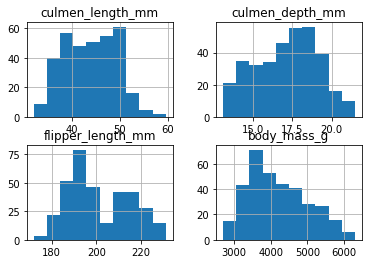

In [ ]:
data.hist()

In [ ]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
data['sex']=label_encoder.fit_transform(data['sex'])
data['island']=label_encoder.fit_transform(data['island'])
data['species']=label_encoder.fit_transform(data['species'])

In [ ]:
data['sex'].value_counts()

1    179
0    165
Name: sex, dtype: int64

In [ ]:
data['island'].value_counts()

0    168
1    124
2     52
Name: island, dtype: int64

In [ ]:
data['species'].value_counts()

0    152
2    124
1     68
Name: species, dtype: int64

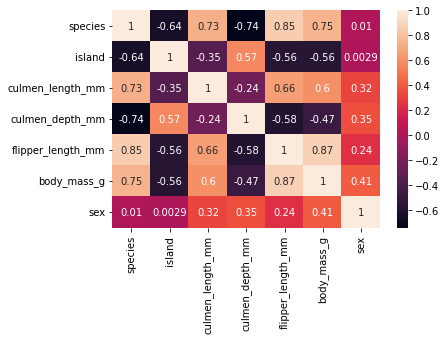

In [ ]:
import seaborn as sns
sns.heatmap(data.corr(),annot=True)

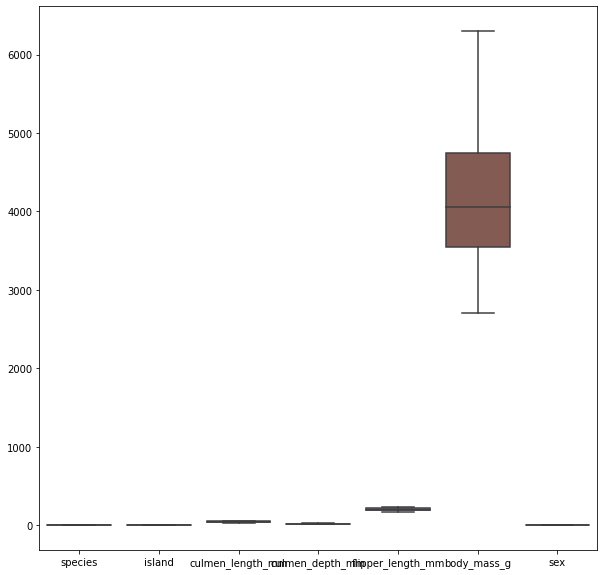

In [ ]:
#outlier detection

import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.boxplot(data=data)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc=StandardScaler()
sc

StandardScaler()

In [ ]:
y=data['species']
x=data.drop(['species'],axis=1)
print(x )
x_scaled= sc.fit_transform(x)
x_scaled

     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0         2          39.10000         18.70000         181.000000   
1         2          39.50000         17.40000         186.000000   
2         2          40.30000         18.00000         195.000000   
3         2          43.92193         17.15117         200.915205   
4         2          36.70000         19.30000         193.000000   
..      ...               ...              ...                ...   
339       0          43.92193         17.15117         200.915205   
340       0          46.80000         14.30000         215.000000   
341       0          50.40000         15.70000         222.000000   
342       0          45.20000         14.80000         212.000000   
343       0          49.90000         16.10000         213.000000   

     body_mass_g  sex  
0    3750.000000    1  
1    3800.000000    0  
2    3250.000000    0  
3    4201.754386    1  
4    3450.000000    0  
..           ...  ...  
339

array([[ 1.84407623, -0.88708123,  0.78774251, -1.42248782, -0.56578921,
         0.96009776],
       [ 1.84407623, -0.81349399,  0.12655633, -1.06535169, -0.50316788,
        -1.0415606 ],
       [ 1.84407623, -0.66631952,  0.43171918, -0.42250666, -1.19200251,
        -1.0415606 ],
       ...,
       [-0.91402039,  1.1917582 , -0.73807176,  1.50602843,  1.93906399,
         0.96009776],
       [-0.91402039,  0.23512413, -1.19581604,  0.79175618,  1.25022936,
        -1.0415606 ],
       [-0.91402039,  1.09977416, -0.53462985,  0.8631834 ,  1.50071468,
         0.96009776]])

In [ ]:
#splitting data
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x_scaled,y,train_size=0.8, random_state=101)

In [1]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr=LogisticRegression(solver='liblinear',multi_class='ovr')

In [ ]:
lr.fit(xtrain,ytrain)

LogisticRegression(multi_class='ovr', solver='liblinear')

In [ ]:
predictions_train=lr.predict(xtrain)
predictions_test=lr.predict(xtest)

In [ ]:
from sklearn import metrics

In [ ]:
print("Accuracy score :",format(metrics.accuracy_score(predictions_train,ytrain)))
print("Accuracy score :" ,format(metrics.accuracy_score(predictions_test,ytest) ))

Accuracy score : 0.9890909090909091
Accuracy score : 1.0


In [ ]:
weight=lr.coef_
weight

array([[ 0.4817697 , -3.96376115,  1.27671393, -0.69308692,  0.14118331,
         1.11257205],
       [ 0.35899115,  3.56650592,  0.9083582 , -0.64487747, -2.06222738,
        -0.82176044],
       [-1.08559698,  0.40337676, -2.09745997,  1.46197088,  1.39917834,
         0.07379139]])

In [ ]:
cm=metrics.confusion_matrix(ytest,predictions_test)
print(cm)

[[31  0  0]
 [ 0 17  0]
 [ 0  0 21]]


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(metrics.classification_report(ytest,predictions_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        21

    accuracy                           1.00        69
   macro avg       1.00      1.00      1.00        69
weighted avg       1.00      1.00      1.00        69



In [ ]:
from sklearn import svm


In [ ]:
rbf =svm.SVC(kernel='rbf',gamma=0.5,C=0.1,decision_function_shape='ovr').fit(xtrain,ytrain)
poly=svm.SVC(kernel='poly',degree=3,C=1,decision_function_shape='ovo').fit(xtrain,ytrain)

In [ ]:
poly_pred_train=poly.predict(xtrain)
rbf_pred_train=rbf.predict(xtrain)

In [ ]:
poly_pred_test=poly.predict(xtest)
rbf_pred_test=rbf.predict(xtest)

In [ ]:
print("Accuracy score :",format(metrics.accuracy_score(poly_pred_train,ytrain)))

Accuracy score : 0.9890909090909091


In [ ]:
print("Accuracy score :",format(metrics.accuracy_score(poly_pred_test,ytest)))

Accuracy score : 1.0


In [ ]:
from sklearn import metrics

In [ ]:
cm=metrics.confusion_matrix(poly_pred_test,ytest)
print(cm)

[[31  0  0]
 [ 0 17  0]
 [ 0  0 21]]


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(poly_pred_test,ytest))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        21

    accuracy                           1.00        69
   macro avg       1.00      1.00      1.00        69
weighted avg       1.00      1.00      1.00        69



In [ ]:
print("Accuracy score :",format(metrics.accuracy_score(poly_pred_test,ytest)))

Accuracy score : 1.0
